In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

from subgraph import (
    YaleStarCatalog,
    StarDatabase,
    PairDatabase,
)
from utils import *


font_setting()
cmap = plt.get_cmap("ocean")

DPI = 100
FIG_SIZE = (12, 7)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
### probrem setting
# os
log_dir = "./log/temp/"
seed = 100
# param
U = 1024
theta_FOV = 20

### compute params
seed_seq = np.random.SeedSequence(seed)
np_random = np.random.Generator(np.random.PCG64(seed_seq))
theta_res = np.arctan2(2 * np.tan(theta_FOV / 2), U)
epsilon = 2 * np.sqrt(2) * theta_res
theta_min = epsilon
theta_max = 2 * np.arctan(np.sqrt(2) * np.tan(theta_FOV / 2))

theta_FOV_list = [5, 10, 20, 40, 80]
M_lim_list = [3.5, 4.5, 5.5]
beta_list = [0.0, 0.2, 0.4, 0.6, 0.8]
M_lim_max = max(M_lim_list)

In [3]:
### Database ###
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec
# StarDB
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim_max)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB_HR = D_DB.get_HR()

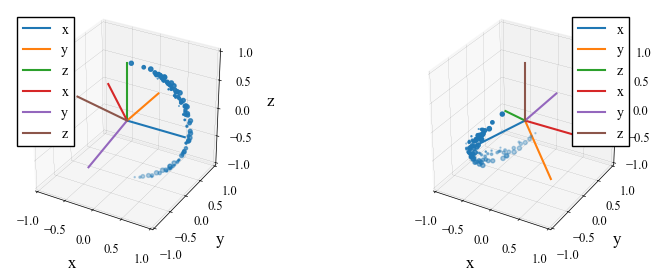

In [6]:
R = special_ortho_group.rvs(dim=3, size=1, random_state=np_random)

# plot 
N = 100
fig = plt.figure(figsize=(4.8*2, 3), dpi=100)
ax = fig.add_subplot(121, projection="3d")

ex = np.array([1,0,0])
ey = np.array([0,1,0])
ez = np.array([0,0,1])
ex_line = [[0, ex_i] for ex_i in ex]
ey_line = [[0, ey_i] for ey_i in ey]
ez_line = [[0, ez_i] for ez_i in ez]
ax.plot(*ex_line, label = "x")
ax.plot(*ey_line, label = "y")
ax.plot(*ez_line, label = "z")

Rex = np.dot(ex, R)
Rey = np.dot(ey, R)
Rez = np.dot(ez, R)
Rex_line = [[0, ex_i] for ex_i in Rex]
Rey_line = [[0, ey_i] for ey_i in Rey]
Rez_line = [[0, ez_i] for ez_i in Rez]
ax.plot(*Rex_line, label = "x")
ax.plot(*Rey_line, label = "y")
ax.plot(*Rez_line, label = "z")

s = D_DB.get_s_vec()
ax.scatter(s[:N, 0], s[:N, 1], s[:N, 2], s=np.arange(N)/10)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect((1,1,1))
ax.legend()
# ax.view_init(0, 0)


ax = fig.add_subplot(122, projection="3d")

ex = np.dot(R, ex)
ey = np.dot(R, ey)
ez = np.dot(R, ez)
ex_line = [[0, ex_i] for ex_i in ex]
ey_line = [[0, ey_i] for ey_i in ey]
ez_line = [[0, ez_i] for ez_i in ez]
ax.plot(*ex_line, label = "x")
ax.plot(*ey_line, label = "y")
ax.plot(*ez_line, label = "z")

Rex = np.dot(R, Rex)
Rey = np.dot(R, Rey)
Rez = np.dot(R, Rez)
Rex_line = [[0, ex_i] for ex_i in Rex]
Rey_line = [[0, ey_i] for ey_i in Rey]
Rez_line = [[0, ez_i] for ez_i in Rez]
ax.plot(*Rex_line, label = "x")
ax.plot(*Rey_line, label = "y")
ax.plot(*Rez_line, label = "z")

Rs = np.dot(R, s.T).T
ax.scatter(Rs[:N, 0], Rs[:N, 1], Rs[:N, 2], s=np.arange(N)/10)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect((1,1,1))
ax.legend()
# ax.view_init(0, 0)
